# Analyse du jeu de données

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import s3fs
import zipfile

In [6]:
# Chargement du jeu de données HC3
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})
PATH_IN = 'gvimont/diffusion/hackathon-minarm-2024/AIVSAI/HC3.zip'
fs.download(PATH_IN, 'data/HC3.zip')
with zipfile.ZipFile("data/HC3.zip","r") as zip_file:
    zip_file.extractall("data/")


In [7]:
# Finance
df_finance = pd.read_json('data/HC3/finance.jsonl', lines=True)
df_finance.head()

,question,human_answers,chatgpt_answers
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...


In [8]:
# Medicine
df_medicine = pd.read_json('data/HC3/medicine.jsonl', lines=True)
df_medicine.head()

,question,human_answers,chatgpt_answers
0,Does Primolut N taken during pregnancy affect ...,"[Hi, Thanks for the query. I understand yo...",[It is not recommended to use Primolut N durin...
1,Bloating and pain on right lower abdomen. Shou...,"[Hello,Thanks for the query to H.C.M. Forum.Pa...",[If you are experiencing abdominal pain and bl...
2,Is chest pain related to intake of clindamycin...,"[Hello, The use of Clindamycin can cause stoma...",[It is possible that chest pain could be relat...
3,Q. Noticed a yellowish sag in the gums of my 1...,[Hello. Revert back with the photos to a denti...,[It is difficult to accurately diagnose a cond...
4,"Suggest remedy for low grade fever, hot and co...","[Hi Dear,Welcome to Healthcaremagic Team.Under...",[I'm sorry to hear that you're feeling sick. I...


In [9]:
# Open QA
df_open_qa = pd.read_json('data/HC3/open_qa.jsonl', lines=True)
df_open_qa.head()

,question,human_answers,chatgpt_answers
0,what composer used sound mass,"[Composers and works include Barbara Kolb , Pa...",[Sound mass is a term used to describe a type ...
1,where did the persian war take place,[The Greco-Persian Wars (also often called the...,[The Persian Wars were a series of conflicts f...
2,what are add ons,"[Plug-in (computing) , a piece of software whi...","[Add-ons, also known as extensions or plug-ins..."
3,how does a dredge work?,[Dredging is an excavation activity or operati...,[A dredge is a piece of equipment that is used...
4,what classes are considered humanities,[The humanities are academic disciplines that ...,[Humanities are academic disciplines that stud...


In [10]:
# Wiki
df_wiki = pd.read_json('data/HC3/wiki_csai.jsonl', lines=True)
df_wiki

,question,human_answers,chatgpt_answers
0,"Please explain what is ""Animal cognition""",[Animal cognition encompasses the mental capac...,[Animal cognition refers to the mental capacit...
1,"Please explain what is ""Human intelligence""",[Human intelligence is the intellectual capabi...,[Human intelligence is the mental ability to t...
2,"Please explain what is ""Oxford English Diction...",[The Oxford English Dictionary (OED) is the fi...,[The Oxford English Dictionary (OED) is a comp...
3,"Please explain what is ""Oxford University Press""",[Oxford University Press (OUP) is the universi...,[Oxford University Press (OUP) is a department...
4,"Please explain what is ""AI applications""",[Artificial intelligence (AI) has been used in...,[AI applications are computer systems that are...
...,...,...,...
837,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...
838,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...
839,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...
840,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o..."


In [11]:
# Concaténation des sources
df = pd.concat([df_finance, df_medicine, df_open_qa, df_wiki], ignore_index=True)
df

,question,human_answers,chatgpt_answers
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...
...,...,...,...
7205,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...
7206,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...
7207,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...
7208,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o..."


In [12]:
def compter_mots(texte_liste):
    texte = " ".join(texte_liste)
    return len(texte.split())

# Appliquer la fonction pour compter le nombre de mots
df['Nombre de mots dans Réponse Humaine'] = df['human_answers'].apply(compter_mots)
df['Nombre de mots dans Réponse GPT'] = df['chatgpt_answers'].apply(compter_mots)

# Calcul du nombre moyen de mots moyen
moyenne_reponse_humain = df['Nombre de mots dans Réponse Humaine'].mean()
moyenne_reponse_gpt = df['Nombre de mots dans Réponse GPT'].mean()

print("Nombre moyen de mots dans Réponse Humaine :", moyenne_reponse_humain)
print("Nombre moyen de mots dans Réponse GPT :", moyenne_reponse_gpt)

Nombre moyen de mots dans Réponse Humaine : 138.03314840499306
Nombre moyen de mots dans Réponse GPT : 241.70097087378642


## Liste des analyses effectuées : 
1. Informations générales  
2. Rajouter la source des questions 
3. Calcul du nombre de réponses par source (bar chart)
4. Calcul du nombre moyen de mots par réponse par source (bar chart)
5. Identification des mots clés 

In [13]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   question                             7210 non-null   object
 1   human_answers                        7210 non-null   object
 2   chatgpt_answers                      7210 non-null   object
 3   Nombre de mots dans Réponse Humaine  7210 non-null   int64 
 4   Nombre de mots dans Réponse GPT      7210 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 281.8+ KB


In [14]:
#Rajouter la source de chaque dataset

# Finance 
df_finance['source'] = 'finance'
df_finance

,question,human_answers,chatgpt_answers,source
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...,finance
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...,finance
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...,finance
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...,finance
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...,finance
...,...,...,...,...
3928,Challenged an apparently bogus credit card cha...,[Yes. For $15 it's not worth anyone's time to...,[If you have challenged a credit card charge t...,finance
3929,Does a stay at home mom need term life insurance?,[Another source of insurance can be through th...,[It is generally a good idea for stay-at-home ...,finance
3930,Rules for SEP contributions in an LLC?,[From Schwab - What are the eligibility requi...,[A SEP (Simplified Employee Pension) is a type...,finance
3931,How do credit card payments work? What ensures...,[Your credit card limit is nothing more than a...,"[When you make a purchase with a credit card, ...",finance


In [15]:
# Médecine 
df_medicine['source'] = 'medicine'
df_medicine

,question,human_answers,chatgpt_answers,source
0,Does Primolut N taken during pregnancy affect ...,"[Hi, Thanks for the query. I understand yo...",[It is not recommended to use Primolut N durin...,medicine
1,Bloating and pain on right lower abdomen. Shou...,"[Hello,Thanks for the query to H.C.M. Forum.Pa...",[If you are experiencing abdominal pain and bl...,medicine
2,Is chest pain related to intake of clindamycin...,"[Hello, The use of Clindamycin can cause stoma...",[It is possible that chest pain could be relat...,medicine
3,Q. Noticed a yellowish sag in the gums of my 1...,[Hello. Revert back with the photos to a denti...,[It is difficult to accurately diagnose a cond...,medicine
4,"Suggest remedy for low grade fever, hot and co...","[Hi Dear,Welcome to Healthcaremagic Team.Under...",[I'm sorry to hear that you're feeling sick. I...,medicine
...,...,...,...,...
1243,Is rise in pressure from 116/66 to 140/80 norm...,[Hello!Welcome and thank you for asking on HCM...,[It's not uncommon for blood pressure to fluct...,medicine
1244,What could cause a painless lump in the right ...,"[Hi, * As per my surgical experience, the issu...",[There are several possible causes of a painle...,medicine
1245,Can Acutret be given to a child for treatment ...,[Although it is difficult to comment whether A...,[It is not appropriate for me to recommend a s...,medicine
1246,Are BP of 119/65 and pulse of 35 causes for co...,[Welcome and thank you for asking on HCM! I ha...,[It is not uncommon for people with rheumatoid...,medicine


In [16]:
# Open Qa 
df_open_qa['source'] = 'open_qa'
df_open_qa

,question,human_answers,chatgpt_answers,source
0,what composer used sound mass,"[Composers and works include Barbara Kolb , Pa...",[Sound mass is a term used to describe a type ...,open_qa
1,where did the persian war take place,[The Greco-Persian Wars (also often called the...,[The Persian Wars were a series of conflicts f...,open_qa
2,what are add ons,"[Plug-in (computing) , a piece of software whi...","[Add-ons, also known as extensions or plug-ins...",open_qa
3,how does a dredge work?,[Dredging is an excavation activity or operati...,[A dredge is a piece of equipment that is used...,open_qa
4,what classes are considered humanities,[The humanities are academic disciplines that ...,[Humanities are academic disciplines that stud...,open_qa
...,...,...,...,...
1182,when did secretariat win,"[Secretariat (March 30, 1970 – October 4, 1989...",[Secretariat was an American Thoroughbred race...,open_qa
1183,what is a full job time??,[Full-time employment is employment in which a...,[A full-time job typically refers to a job tha...,open_qa
1184,what are the three primary colors in the subtr...,"[The overlapping subtractive yellow, cyan and ...",[The three primary colors in the subtractive c...,open_qa
1185,what are layers of the ionosphere,[The ionosphere is a region of the upper atmos...,[The ionosphere is a region of Earth's upper a...,open_qa


In [17]:
# Wiki 
df_wiki['source'] = 'wiki_csai'
df_wiki

,question,human_answers,chatgpt_answers,source
0,"Please explain what is ""Animal cognition""",[Animal cognition encompasses the mental capac...,[Animal cognition refers to the mental capacit...,wiki_csai
1,"Please explain what is ""Human intelligence""",[Human intelligence is the intellectual capabi...,[Human intelligence is the mental ability to t...,wiki_csai
2,"Please explain what is ""Oxford English Diction...",[The Oxford English Dictionary (OED) is the fi...,[The Oxford English Dictionary (OED) is a comp...,wiki_csai
3,"Please explain what is ""Oxford University Press""",[Oxford University Press (OUP) is the universi...,[Oxford University Press (OUP) is a department...,wiki_csai
4,"Please explain what is ""AI applications""",[Artificial intelligence (AI) has been used in...,[AI applications are computer systems that are...,wiki_csai
...,...,...,...,...
837,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...,wiki_csai
838,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...,wiki_csai
839,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...,wiki_csai
840,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o...",wiki_csai


In [18]:
# Concaténation des sous ensembles
df_sourced = pd.concat([df_finance, df_medicine, df_open_qa, df_wiki], ignore_index=True)
df_sourced

,question,human_answers,chatgpt_answers,source
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...,finance
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...,finance
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...,finance
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...,finance
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...,finance
...,...,...,...,...
7205,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...,wiki_csai
7206,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...,wiki_csai
7207,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...,wiki_csai
7208,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o...",wiki_csai


In [19]:
# Afficher le nombre d'élements dans les listes de la colonne chatgpt_answers 
def count_sentences(list):
    return len(list)

df_sourced['answers_number'] = df_sourced['chatgpt_answers'].apply(count_sentences)
df_sourced

,question,human_answers,chatgpt_answers,source,answers_number
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...,finance,1
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...,finance,1
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...,finance,1
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...,finance,1
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...,finance,1
...,...,...,...,...,...
7205,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...,wiki_csai,1
7206,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...,wiki_csai,1
7207,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...,wiki_csai,1
7208,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o...",wiki_csai,1


In [20]:
# Convertir les listes en chaines de caractères 
separator = ' ' 
df_sourced['human_answers'] = df_sourced['human_answers'].apply(lambda x: separator.join(x))
df_sourced['chatgpt_answers'] = df_sourced['chatgpt_answers'].apply(lambda x: separator.join(x))

df_sourced

,question,human_answers,chatgpt_answers,source,answers_number
0,Historical P/E ratios of small-cap vs. large-c...,There is most likely an error in the WSJ's dat...,Historical price-to-earnings (P/E) ratios for ...,finance,1
1,Should you co-sign a personal loan for a frien...,I know this question has a lot of answers alre...,Co-signing a personal loan for a friend or fam...,finance,1
2,Should I avoid credit card use to improve our ...,If you pay it off before the cycle closes it w...,It can be a good idea to avoid using credit ca...,finance,1
3,Difference between 'split and redemption' of s...,It is the first time I encounter redemption pr...,Share split and redemption are two different c...,finance,1
4,Pros & cons of investing in gold vs. platinum?,Why Investors Buy Platinum is an old (1995) ar...,Gold and platinum are both precious metals tha...,finance,1
...,...,...,...,...,...
7205,"Please explain what is ""Punched cards""",A punched card (also punch card or punched-car...,Punched cards were a means of storing and proc...,wiki_csai,1
7206,"Please explain what is ""Paper tape""",Punched tape or perforated paper tape is a for...,Paper tape is a medium for storing and transmi...,wiki_csai,1
7207,"Please explain what is ""BBC Model B""",The British Broadcasting Corporation Microcomp...,The BBC Model B is a computer that was made by...,wiki_csai,1
7208,"Please explain what is ""O level""",The O-Level (Ordinary Level) is a subject-base...,"""O level"" refers to the General Certificate of...",wiki_csai,1


/tmp/ipykernel_82505/412663182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_count.index, y=source_count.values, palette='viridis')


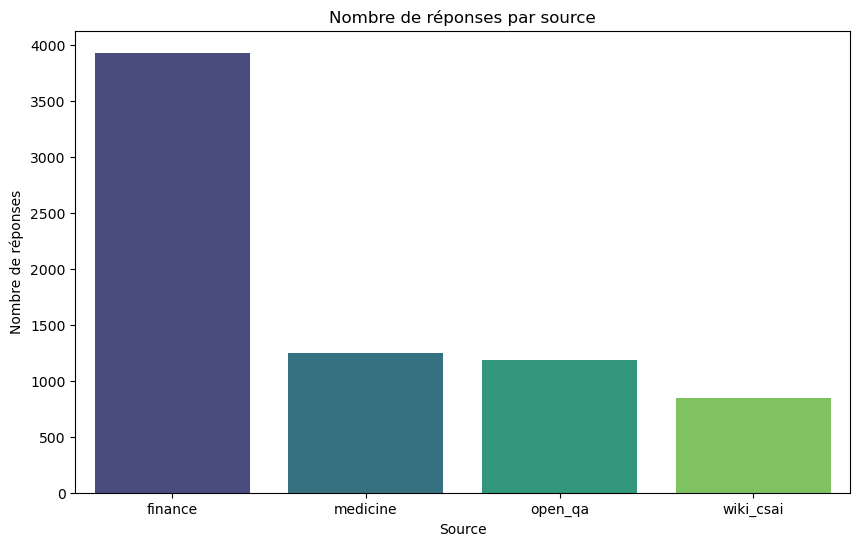

In [21]:
# Calcul du nombre de réponses par source (bar chart)

source_count = df_sourced['source'].value_counts()

plt.figure(figsize=(10, 6))  
sns.barplot(x=source_count.index, y=source_count.values, palette='viridis')

plt.xlabel('Source')
plt.ylabel('Nombre de réponses')
plt.title('Nombre de réponses par source')

plt.show()

In [22]:
# Calcul du nombre moyen de mots par réponse par source (bar chart)
# Ajout d'une colonne qui indique le nombre de mots dans la réponse de ChatGPT puis dans la réponse humaine

df_sourced['number_words_human'] = df_sourced['human_answers'].apply(lambda x: len(x.split()))
df_sourced['number_words_AI'] = df_sourced['chatgpt_answers'].apply(lambda x: len(x.split()))

df_sourced

,question,human_answers,chatgpt_answers,source,answers_number,number_words_human,number_words_AI
0,Historical P/E ratios of small-cap vs. large-c...,There is most likely an error in the WSJ's dat...,Historical price-to-earnings (P/E) ratios for ...,finance,1,47,185
1,Should you co-sign a personal loan for a frien...,I know this question has a lot of answers alre...,Co-signing a personal loan for a friend or fam...,finance,1,157,267
2,Should I avoid credit card use to improve our ...,If you pay it off before the cycle closes it w...,It can be a good idea to avoid using credit ca...,finance,1,82,227
3,Difference between 'split and redemption' of s...,It is the first time I encounter redemption pr...,Share split and redemption are two different c...,finance,1,148,198
4,Pros & cons of investing in gold vs. platinum?,Why Investors Buy Platinum is an old (1995) ar...,Gold and platinum are both precious metals tha...,finance,1,19,289
...,...,...,...,...,...,...,...
7205,"Please explain what is ""Punched cards""",A punched card (also punch card or punched-car...,Punched cards were a means of storing and proc...,wiki_csai,1,143,173
7206,"Please explain what is ""Paper tape""",Punched tape or perforated paper tape is a for...,Paper tape is a medium for storing and transmi...,wiki_csai,1,138,172
7207,"Please explain what is ""BBC Model B""",The British Broadcasting Corporation Microcomp...,The BBC Model B is a computer that was made by...,wiki_csai,1,195,144
7208,"Please explain what is ""O level""",The O-Level (Ordinary Level) is a subject-base...,"""O level"" refers to the General Certificate of...",wiki_csai,1,217,95


/tmp/ipykernel_82505/1863925314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_number_words_human.index, y=mean_number_words_human.values, palette='viridis')


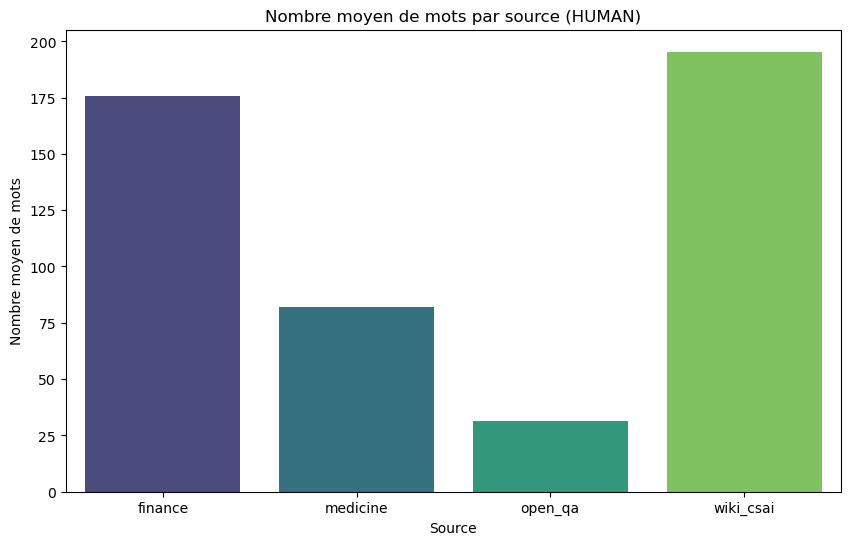

In [23]:
# Graphique en barres qui représente le nombre de mots moyen par catégories 
# Pour les réponses humaines

mean_number_words_human = df_sourced.groupby('source')['number_words_human'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_number_words_human.index, y=mean_number_words_human.values, palette='viridis')

plt.xlabel('Source')
plt.ylabel('Nombre moyen de mots')
plt.title('Nombre moyen de mots par source (HUMAN)')

plt.show()

/tmp/ipykernel_82505/377607585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_number_words_ai.index, y=mean_number_words_ai.values, palette='viridis')


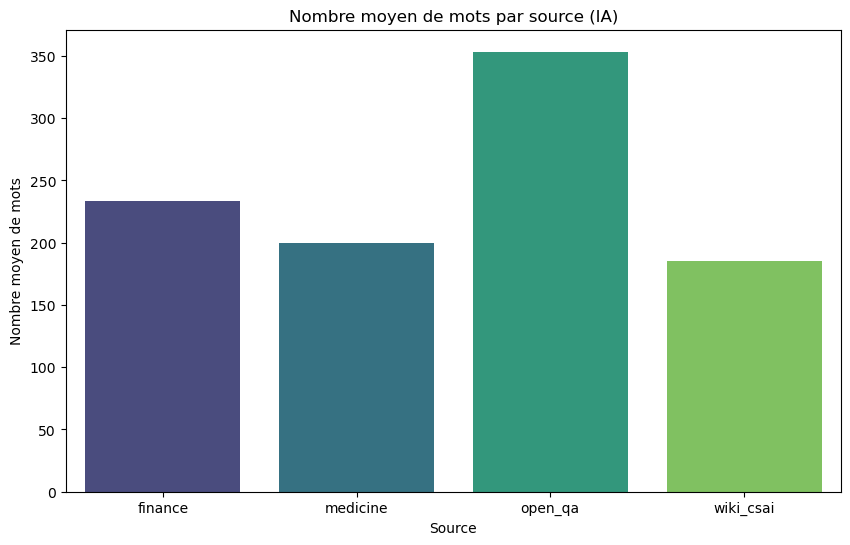

In [24]:
# Pour les réponses de ChatGPT
mean_number_words_ai = df_sourced.groupby('source')['number_words_AI'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_number_words_ai.index, y=mean_number_words_ai.values, palette='viridis')

plt.xlabel('Source')
plt.ylabel('Nombre moyen de mots')
plt.title('Nombre moyen de mots par source (IA)')

plt.show()

In [25]:
!pip install wordcloud matplotlib

In [26]:
# Identification des mots clés 
# Pour les réponses humaines
all_text = ' '.join(df_sourced['human_answers'])

word_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')  
plt.title('Nuage de mots à partir des réponses humaines')
plt.show()

NameError: name 'Counter' is not defined

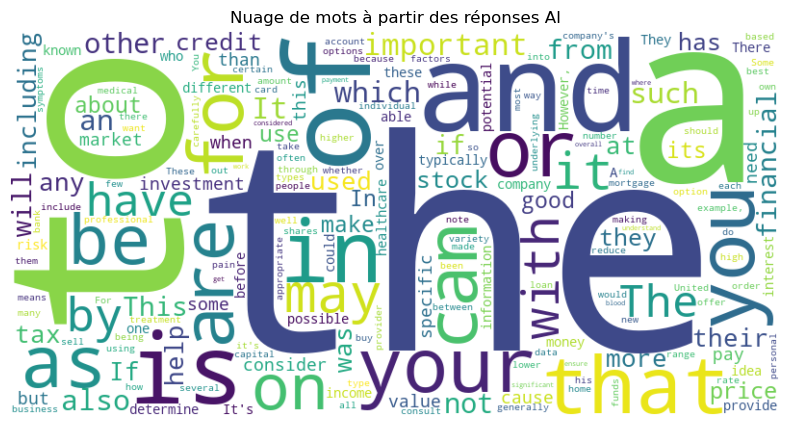

In [ ]:
# Pour les réponses de ChatGPT
all_text = ' '.join(df_sourced['chatgpt_answers'])

word_counts_ia = Counter(all_text.split())

wordcloud_ia = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_ia)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ia, interpolation='bilinear')  
plt.axis('off')  
plt.title('Nuage de mots à partir des réponses AI')
plt.show()